In [2]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function
from sklearn.model_selection import train_test_split

In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
hai = pd.read_csv( '/Users/surabhisinghal/Documents/gitrepo/hai/CAUTI/Data/dummy_transfer/hai_cauti_como_3_foley.csv')

In [5]:
hai.head()

Unnamed: 0  hosp_admission_id   age    psex   department  bed_no  \
0           0       2.016198e+09  47.0  Female   Nephrology     NaN   
1           1       2.016135e+09  62.0    Male  Orthopedics  1007.0   
2           2       2.016135e+09  62.0    Male  Orthopedics  1006.0   
3           3       2.016135e+09  62.0    Male  Orthopedics    43.0   
4           4       2.016135e+09  62.0    Male  Orthopedics    43.0   

         unit_name    ward_name  num_adm  pre_adm    icu  
0  Nephrology Unit          AB4      1.0      0.0  False  
1           Unit-I  NPW I Floor      9.0      0.0  False  
2           Unit-I  NPW I Floor      9.0      0.0  False  
3           Unit-I          AB1      9.0      0.0  False  
4           Unit-I          AB1      9.0      0.0  False

In [9]:
h2o.shutdown()
h2o.init()

[WARNING] in <ipython-input-9-eb626e06a7f1> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0_/7y64prf90vv00w725pwjv9vc0000gn/T/tmpj2j8shrz
  JVM stdout: /var/folders/0_/7y64prf90vv00w725pwjv9vc0000gn/T/tmpj2j8shrz/h2o_surabhisinghal_started_from_python.out
  JVM stderr: /var/folders/0_/7y64prf90vv00w725pwjv9vc0000gn/T/tmpj2j8shrz/h2o_surabhisinghal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Asia/Kolkata
H2O data parsing timezone:  UTC
H2O cluster version:        3.20.0.3
H2O cluster version age:    9 months and 18 days !!!
H2O cluster name:           H2O_from_python_surabhisinghal_uju781
H2O cluster total nodes:    1
H2O cluster free memory:    3.556 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.4 final
--------------------------  ----------------------------------------

In [10]:
#importing data set
hai = h2o.import_file(path = '/Users/surabhisinghal/Documents/gitrepo/cauti_prediction_Deployment/cauti-prediction/Data/dummy_transfer/hai_cauti_como_2_foley.csv')
#hai = h2o.import_file(path = 'hai_cauti_como_2_foley.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
# split into train and validation sets
train2, test2 = hai.split_frame(ratios = [.8], seed = 3678)
print('train2', train2.shape)
print('test2', test2.shape)
#print('valid2', valid2.shape)
print(hai.shape)

train2 (10176, 36)
test2 (2503, 36)
(12679, 36)


In [12]:
x1=["psex","department","bed_no", "unit_name","ward_name","SURGERY","num_adm","age",'charlson_index' , 'pre_adm', 'icu']

'''
x2 = ["psex","department","bed_no", "unit_name","ward_name","SURGERY","num_adm","age", 'pre_adm', 'icu','Cancer', 
      'Cerebrovascular_Disease_or_Tran', 'Liver_Disease', 'Heart_Disease', 'Diabetes', 'No_Comorbidity_Not_Sure', 
      'Renal_Disease','Dementia', 'HIV_AIDS', 'Pulmonary_Disease', 'Connective_Tissue_Disease', 'Hypertension']
'''


'\nx2 = ["psex","department","bed_no", "unit_name","ward_name","SURGERY","num_adm","age", \'pre_adm\', \'icu\',\'Cancer\', \n      \'Cerebrovascular_Disease_or_Tran\', \'Liver_Disease\', \'Heart_Disease\', \'Diabetes\', \'No_Comorbidity_Not_Sure\', \n      \'Renal_Disease\',\'Dementia\', \'HIV_AIDS\', \'Pulmonary_Disease\', \'Connective_Tissue_Disease\', \'Hypertension\']\n'

In [13]:
y='dummy_growth_positive'

In [14]:
to_convert = ["psex","department","bed_no", "unit_name","ward_name","SURGERY", 'icu','dummy_growth_positive', 'pre_adm',
             'Cancer', 'Cerebrovascular_Disease_or_Tran', 'Liver_Disease', 'Heart_Disease', 'Diabetes', 'No_Comorbidity_Not_Sure', 
      'Renal_Disease','Dementia', 'HIV_AIDS', 'Pulmonary_Disease', 'Connective_Tissue_Disease', 'Hypertension']
to_numeric = ["num_adm","age",'charlson_index' ]
    

In [15]:
#def conversions(df)
for col in to_convert:
    train2[col] = train2[col].asfactor()
    test2[col] = test2[col].asfactor()
    #valid2[col] = valid2[col].asfactor() 
    
for col in to_numeric:
    train2[col]= train2[col].asnumeric()
    test2[col]= test2[col].asnumeric()
    #valid2[col] = valid2[col].asnumeric() 

In [16]:
aml = H2OAutoML(max_models =10, stopping_rounds=3,nfolds=10, seed=789)


In [17]:
aml.train(x=x1, y = y,
          training_frame = train2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [19]:
aml.leaderboard

model_id auc logloss mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_0_AutoML_20190307_150546 0.766154 0.254798 0.299379 0.263843 0.0696132 
 StackedEnsemble_BestOfFamily_0_AutoML_20190307_150546 0.766054 0.254642 0.299599 0.263775 0.069577 
 GBM_grid_0_AutoML_20190307_150546_model_4 0.756783 0.263591 0.303756 0.267133 0.0713602 
 GBM_grid_0_AutoML_20190307_150546_model_2 0.75424 0.265646 0.296651 0.268558 0.0721235 
 GBM_grid_0_AutoML_20190307_150546_model_3 0.753383 0.26859 0.297806 0.2689 0.072307 
 GBM_grid_0_AutoML_20190307_150546_model_1 0.752733 0.264398 0.302524 0.268088 0.0718714 
 GBM_grid_0_AutoML_20190307_150546_model_0 0.752568 0.263931 0.308604 0.268267 0.071967 
 DRF_0_AutoML_20190307_150546 0.748651 0.619312 0.325347 0.271737 0.0738411 
 GBM_grid_0_AutoML_20190307_150546_model_5 0.742391 0.288519 0.349343 0.276225 0.0763002 
 XRT_0_AutoML_20190307_150546 0.733538 0.269683 0.350117 0.268714 0.0722072

In [20]:
aml.leader


Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20190307_150546
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.053129292075135476
RMSE: 0.23049792206251118
LogLoss: 0.18957173177770653
Null degrees of freedom: 8148
Residual degrees of freedom: 8141
Null deviance: 4924.234009761503
Residual deviance: 3089.640084513061
AIC: 3105.640084513061
AUC: 0.9555754908049813
Gini: 0.9111509816099626
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13027667466716245: 


FALSE    TRUE    Error    Rate
-----  -------  ------  -------  --------------
FALSE  6816     601     0.081    (601.0/7417.0)
TRUE   142      590     0.194    (142.0/732.0)
Total  6958     1191    0.0912   (743.0/8149.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.130277     0.613625  213
max f2                       0.0906262    0.749388  255
max f0point5                 0.281733     0.637755  122
max accuracy                 0.281733     0.934102  122
max precision                0.933411     1         0
max recall                   0.0514144    1         339
max specificity              0.933411     1         0
max absolute_mcc             0.115611     0.590173  227
max min_per_class_accuracy   0.102922     0.892077  240
max mean_per_class_accuracy  0.0819184    0.904995  267

Gains/Lift Table: Avg response rate:  8.98 %



group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  ---------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0101853                   0.764241           10.4619    10.4619            0.939759         0.939759                    0.106557        0.106557                   946.188   946.188
    2        0.0263836                   0.554165           8.01204    8.95779            0.719697         0.804651                    0.129781        0.236339                   701.204   795.779
    3        0.030065                    0.46662            10.3903    9.13321            0.933333         0.820408                    0.0382514       0.27459                    939.035   813.321
    4        0.0400049                   0.344586           7.42168    8.70795            0.666667         0.782209                    0.0737705       0.348361                   642.168   770.795
    5        0.0593938                   0.278793           4.65029    7.38334            0.417722         0.663223                    0.0901639       0.438525                   365.029   638.334
    6        0.100012                    0.164615           5.01131    6.41998            0.450151         0.576687                    0.203552        0.642077                   401.131   541.998
    7        0.151552                    0.126893           3.47228    5.41752            0.311905         0.48664                     0.178962        0.821038                   247.228   441.752
    8        0.200025                    0.0848173          2.28287    4.6579             0.205063         0.418405                    0.110656        0.931694                   128.287   365.79
    9        0.300037                    0.0620875          0.614679   3.31016            0.0552147        0.297342                    0.0614754       0.993169                   -38.5321  231.016
    10       0.400049                    0.0541799          0.0409786  2.49286            0.00368098       0.223926                    0.00409836      0.997268                   -95.9021  149.286
    11       0.504356                    0.0493922          0.0261941  1.98273            0.00235294       0.178102                    0.00273224      1                          -97.3806  98.2725
    12       0.599951                    0.0468963          0          1.6668             0                0.149724                    0               1                          -100      66.6803
    13       0.699963                    0.0444097          0          1.42865            0                0.128331                    0               1                          -100      42.8647
    14       0.799975                    0.0423324          0          1.25004            0                0.112287                    0               1                          -100      25.0038
    15       0.901583                    0.0405074          0          1.10916            0                0.0996325                   0               1                          -100      10.916
    16       1                           0.0376154          0          1                  0                0.089827                    0               1                          -100      0



ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.07187975618951037
RMSE: 0.26810400256152533
LogLoss: 0.25729247219780693
Null degrees of freedom: 2026
Residual degrees of freedom: 2019
Null deviance: 1261.5495229987582
Residual deviance: 1043.0636822899094
AIC: 1059.0636822899094
AUC: 0.8053233246425808
Gini: 0.6106466492851617
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1303608500102687: 


FALSE    TRUE    Error    Rate
-----  -------  ------  -------  --------------
FALSE  1669     168     0.0915   (168.0/1837.0)
TRUE   93       97      0.4895   (93.0/190.0)
Total  1762     265     0.1288   (261.0/2027.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.130361     0.426374  133
max f2                       0.0719766    0.514354  229
max f0point5                 0.257335     0.415335  54
max accuracy                 0.635513     0.914159  18
max precision                0.827272     0.923077  7
max recall                   0.0404839    1         384
max specificity              0.914754     0.999456  0
max absolute_mcc             0.130361     0.362322  133
max min_per_class_accuracy   0.0621341    0.718563  261
max mean_per_class_accuracy  0.0719766    0.740127  229

Gains/Lift Table: Avg response rate:  9.37 %



group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain       cumulative_gain
--  -------  --------------------------  -----------------  ---------  -----------------  ---------------  --------------------------  --------------  -------------------------  ---------  -----------------
    1        0.0103601                   0.748295           8.63634    8.63634            0.809524         0.809524                    0.0894737       0.0894737                  763.634    763.634
    2        0.0212136                   0.554165           4.36435    6.45067            0.409091         0.604651                    0.0473684       0.136842                   336.435    545.067
    3        0.0300937                   0.382785           4.74152    5.94633            0.444444         0.557377                    0.0421053       0.178947                   374.152    494.633
    4        0.0404539                   0.291552           4.57218    5.59442            0.428571         0.52439                     0.0473684       0.226316                   357.218    459.442
    5        0.052294                    0.278793           3.55614    5.13292            0.333333         0.481132                    0.0421053       0.268421                   255.614    413.292
    6        0.102615                    0.164177           3.34696    4.25711            0.313725         0.399038                    0.168421        0.436842                   234.696    325.711
    7        0.150962                    0.113592           2.17723    3.591              0.204082         0.336601                    0.105263        0.542105                   117.723    259.1
    8        0.200789                    0.0834194          1.26754    3.01442            0.118812         0.282555                    0.0631579       0.605263                   26.7535    201.442
    9        0.299951                    0.0645918          0.955381   2.33372            0.0895522        0.21875                     0.0947368       0.7                        -4.4619    133.372
    10       0.400099                    0.056242           0.998522   1.99951            0.0935961        0.187423                    0.1             0.8                        -0.147783  99.9507
    11       0.500247                    0.0511167          0.735753   1.74651            0.0689655        0.163708                    0.0736842       0.873684                   -26.4247   74.6507
    12       0.605821                    0.0477719          0.19941    1.4769             0.0186916        0.138436                    0.0210526       0.894737                   -80.059    47.6899
    13       0.700049                    0.0448153          0.558556   1.35329            0.052356         0.12685                     0.0526316       0.947368                   -44.1444   35.3288
    14       0.801677                    0.0425494          0.207154   1.20799            0.0194175        0.113231                    0.0210526       0.968421                   -79.2846   20.7994
    15       0.899852                    0.040682           0.268051   1.10544            0.0251256        0.103618                    0.0263158       0.994737                   -73.1949   10.5445
    16       1                           0.0376154          0.0525538  1                  0.00492611       0.0937346                   0.00526316      1                          -94.7446   0



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06961322771233454
RMSE: 0.2638431877315284
LogLoss: 0.2547979202744268
Null degrees of freedom: 8148
Residual degrees of freedom: 8138
Null deviance: 4925.782388003737
Residual deviance: 4152.696504632609
AIC: 4174.696504632609
AUC: 0.7661541827923004
Gini: 0.5323083655846008
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10981744859208888: 


FALSE    TRUE    Error    Rate
-----  -------  ------  -------  ---------------
FALSE  6492     925     0.1247   (925.0/7417.0)
TRUE   347      385     0.474    (347.0/732.0)
Total  6839     1310    0.1561   (1272.0/8149.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.109817     0.377081  264
max f2                       0.0904206    0.466534  284
max f0point5                 0.491746     0.434211  94
max accuracy                 0.604763     0.919254  64
max precision                0.814687     0.854167  24
max recall                   0.0382966    1         398
max specificity              0.940446     0.999865  0
max absolute_mcc             0.491746     0.319393  94
max min_per_class_accuracy   0.0626048    0.70082   324
max mean_per_class_accuracy  0.0904206    0.709167  284

Gains/Lift Table: Avg response rate:  8.98 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100626                   0.710527           9.09608   9.09608            0.817073         0.817073                    0.0915301       0.0915301                  809.608   809.608
    2        0.0200025                   0.524855           6.73448   7.92253            0.604938         0.711656                    0.0669399       0.15847                    573.448   692.253
    3        0.030065                    0.416139           3.93711   6.58863            0.353659         0.591837                    0.0396175       0.198087                   293.711   558.863
    4        0.0400049                   0.327993           2.88621   5.6687             0.259259         0.509202                    0.0286885       0.226776                   188.621   466.87
    5        0.0503129                   0.292047           3.04819   5.13182            0.27381          0.460976                    0.0314208       0.258197                   204.819   413.182
    6        0.100012                    0.169341           2.47389   3.81101            0.222222         0.342331                    0.122951        0.381148                   147.389   281.101
    7        0.15008                     0.11797            2.29199   3.30425            0.205882         0.296811                    0.114754        0.495902                   129.199   230.425
    8        0.200025                    0.0870897          1.66851   2.89582            0.149877         0.260123                    0.0833333       0.579235                   66.8509   189.582
    9        0.300037                    0.0657981          0.887869  2.2265             0.0797546        0.2                         0.0887978       0.668033                   -11.2131  122.65
    10       0.400049                    0.0562794          0.764933  1.86111            0.0687117        0.167178                    0.0765027       0.744536                   -23.5067  86.111
    11       0.500061                    0.0515704          0.601019  1.60909            0.0539877        0.14454                     0.0601093       0.804645                   -39.8981  60.9092
    12       0.599951                    0.0480262          0.492347  1.42316            0.044226         0.127838                    0.0491803       0.853825                   -50.7653  42.3158
    13       0.699963                    0.0453879          0.560041  1.29983            0.0503067        0.11676                     0.0560109       0.909836                   -43.9959  29.9834
    14       0.799975                    0.0431713          0.314169  1.17661            0.0282209        0.105691                    0.0314208       0.941257                   -68.5831  17.6607
    15       0.899988                    0.0410919          0.314169  1.08077            0.0282209        0.0970821                   0.0314208       0.972678                   -68.5831  8.07676
    16       1                           0.036867           0.273191  1                  0.0245399        0.089827                    0.0273224       1                          -72.6809  0

In [21]:
perf  = aml.leader.model_performance(test2)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06119815921200371
RMSE: 0.2473826170368559
LogLoss: 0.228463231930039
Null degrees of freedom: 2502
Residual degrees of freedom: 2495
Null deviance: 1318.73180182955
Residual deviance: 1143.6869390417755
AIC: 1159.6869390417755
AUC: 0.7667491049557189
Gini: 0.5334982099114378
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.161293083275311: 


FALSE    TRUE    Error    Rate
-----  -------  ------  -------  --------------
FALSE  2148     172     0.0741   (172.0/2320.0)
TRUE   112      71      0.612    (112.0/183.0)
Total  2260     243     0.1135   (284.0/2503.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.161293     0.333333  100
max f2                       0.0687279    0.448399  237
max f0point5                 0.285405     0.350584  55
max accuracy                 0.719149     0.932481  12
max precision                0.914754     1         0
max recall                   0.0394651    1         392
max specificity              0.914754     1         0
max absolute_mcc             0.161293     0.275944  100
max min_per_class_accuracy   0.0649337    0.710383  251
max mean_per_class_accuracy  0.0687279    0.726374  237

Gains/Lift Table: Avg response rate:  7.31 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0103875                   0.657155           9.4691    9.4691             0.692308         0.692308                    0.0983607       0.0983607                  846.91    846.91
    2        0.0247703                   0.554165           4.5592    6.61819            0.333333         0.483871                    0.0655738       0.163934                   355.92    561.819
    3        0.0311626                   0.381702           1.7097    5.61132            0.125            0.410256                    0.010929        0.174863                   70.9699   461.132
    4        0.0403516                   0.288282           4.75742   5.41687            0.347826         0.39604                     0.0437158       0.218579                   375.742   441.687
    5        0.0527367                   0.278793           2.20606   4.66282            0.16129          0.340909                    0.0273224       0.245902                   120.606   366.282
    6        0.105873                    0.154716           2.77665   3.71618            0.203008         0.271698                    0.147541        0.393443                   177.665   271.618
    7        0.151818                    0.107815           2.02191   3.20344            0.147826         0.234211                    0.0928962       0.486339                   102.191   220.344
    8        0.20016                     0.0824415          1.35646   2.75736            0.0991736        0.201597                    0.0655738       0.551913                   35.6456   175.736
    9        0.300439                    0.0657803          1.4713    2.3281             0.10757          0.170213                    0.147541        0.699454                   47.1295   132.81
    10       0.39992                     0.0566031          0.604231  1.89929            0.0441767        0.138861                    0.0601093       0.759563                   -39.5769  89.9287
    11       0.5002                      0.0510932          0.708401  1.66054            0.0517928        0.121406                    0.0710383       0.830601                   -29.1599  66.0539
    12       0.60008                     0.0478323          0.547104  1.47521            0.04             0.107856                    0.0546448       0.885246                   -45.2896  47.5213
    13       0.69996                     0.0449208          0.218842  1.29594            0.016            0.0947489                   0.0218579       0.907104                   -78.1158  29.5937
    14       0.79984                     0.0427241          0.218842  1.16143            0.016            0.0849151                   0.0218579       0.928962                   -78.1158  16.1434
    15       0.89972                     0.0406265          0.273552  1.06287            0.02             0.0777087                   0.0273224       0.956284                   -72.6448  6.28682
    16       1                           0.0376154          0.435939  1                  0.0318725        0.0731123                   0.0437158       1                          -56.4061  0

Could not find exact threshold 0.0735; using closest threshold found 0.07349647132166211.


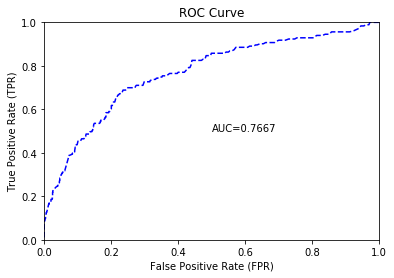

In [23]:
perf.confusion_matrix(thresholds=0.0735)
perf.plot()


In [135]:
thresh=[0.0735]
print('recall' , perf.recall(thresholds=thresh))
print('precision', perf.precision(thresholds=thresh))
print('accuracy', perf.accuracy(thresholds=thresh))
print('F1',perf.F1(thresholds=thresh))


Could not find exact threshold 0.0735; using closest threshold found 0.0734965317460113.
recall [[0.0735, 0.6229508196721312]]
Could not find exact threshold 0.0735; using closest threshold found 0.0734965317460113.
precision [[0.0735, 0.1896838602329451]]
Could not find exact threshold 0.0735; using closest threshold found 0.0734965317460113.
accuracy [[0.0735, 0.7778665601278466]]
Could not find exact threshold 0.0735; using closest threshold found 0.0734965317460113.
F1 [[0.0735, 0.29081632653061223]]


In [46]:
# Save the DRF model to disk
# the model will be saved as "./folder_for_myDRF/myDRF"
h2o.save_model(aml.leader, path = "model1_SA_3dec") # define your path here

# Re-load the DRF model from disk
#model1_SA_21sept = h2o.load_model(path = "/Users/surabhisinghal/Documents/gitrepo/hai/CAUTI/Code/model1_SA_21sept")

# Print the models and compare
#print(am1.leader)
#print(model1_SA_21sept)

'/data/home/surabhi.singhal/catheter_infection/model1_SA_3dec/GBM_grid_0_AutoML_20181203_052624_model_3'

In [ ]:
#The following codes on RF, GBM and GLM (logit) are commented and were carried out just for trial purposes